In [2]:
def show_slices(slices):
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [3]:
def edge_detection(in_file_name, out_file_name, show_image):
    import nibabel as nib
    from skimage import exposure
    from skimage import feature
    from skimage.filters import sobel
    import numpy as np
    import matplotlib.pyplot as plt

    #example_ni1 = os.path.join(data_path, in_file_name)
    n1_img = nib.load(in_file_name)
    img_data = n1_img.get_data()
    #save_example_ni1 = os.path.join(data_path, out_file_name)

    slice = np.zeros((176,176,208))
    for i in range(175):
        slice[i] = img_data[:,:,i,0]

    #print(slice[0].shape)    

    for i in range(175):
        slice[i] = exposure.rescale_intensity(slice[i], out_range=(0, 256))

    if (show_image):
        show_slices([slice[100], slice[110], slice[120]])
        plt.suptitle("slices")

    edges = np.zeros((176,176,208))
    for i in range(175):
        edges[i] = sobel(slice[i])

    for i in range(175):
        img_data[:,:,i,0] = edges[i]        

    if (show_image):
        # display results
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)

        ax1.imshow(img_data[:,:,100,0], cmap="gray", origin="lower")
        ax1.axis('off')
        ax1.set_title('image 100', fontsize=20)

        ax2.imshow(img_data[:,:,110,0], cmap=plt.cm.gray)
        ax2.axis('off')
        ax2.set_title('image 110', fontsize=20)

        ax3.imshow(img_data[:,:,120,0], cmap=plt.cm.gray)
        ax3.axis('off')
        ax3.set_title('image 120', fontsize=20)

        fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                            bottom=0.02, left=0.02, right=0.98)

        plt.show()

    save_img = nib.Nifti1Image(img_data, np.eye(4))
    nib.save(save_img, save_example_ni1)

C:\Users\ia\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:307: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)


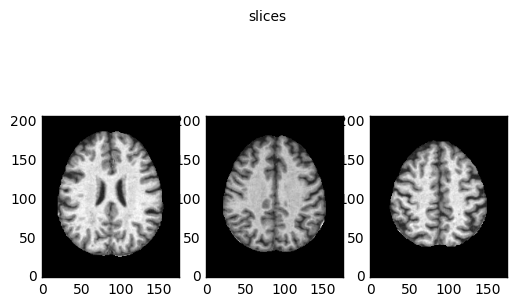

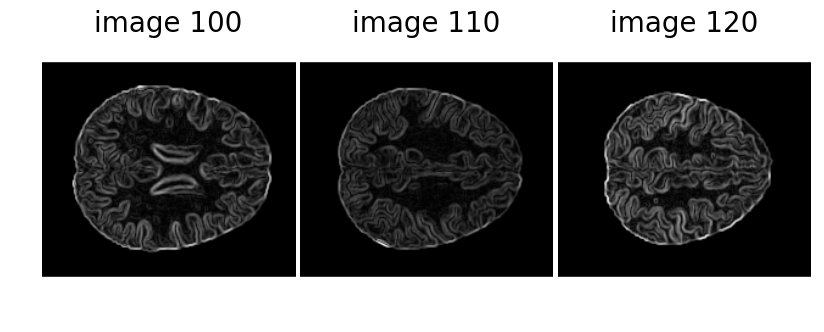

In [4]:
from nibabel.testing import data_path
import os
from IPython.display import *

example_ni1 = os.path.join(data_path, '\\ETH\\data\\set_test\\test_1.nii')
save_example_ni1 = os.path.join(data_path, '\\ETH\\data\\set_test\\test_1_ns.nii')

edge_detection(example_ni1, save_example_ni1, show_image=True)
